In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
import warnings
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
bank_data = pd.read_csv('/content/drive/MyDrive/Dummy-Dataset/bank-data/bank-data/bank-full.csv', delimiter=';', quotechar='"')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [53]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [54]:
categorical_columns = bank_data.dtypes[bank_data.dtypes == 'object']
numerical_columns = bank_data.dtypes[bank_data.dtypes != 'object']

In [55]:
categorical_columns

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
y            object
dtype: object

In [56]:
label_encoder = LabelEncoder()
for column in categorical_columns.index:
    bank_data[column] = label_encoder.fit_transform(bank_data[column])

In [57]:
X = bank_data.iloc[:, :-1]
y = bank_data.iloc[:, -1]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [58]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Logistic regression model**

In [60]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)

ROC auc score =  0.578125046652651


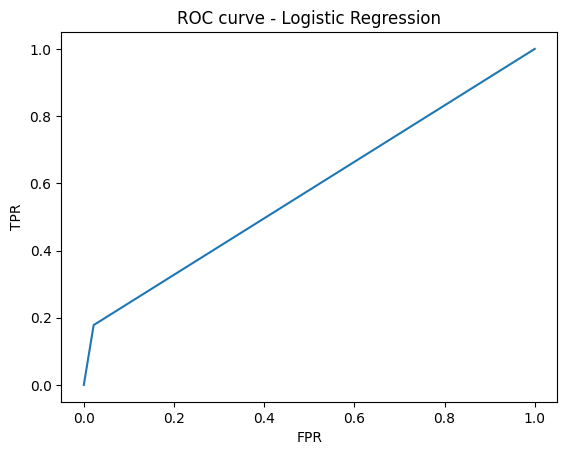

In [61]:
logistic_regression_auc = roc_auc_score(y_test, logistic_regression_predictions)
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_test, logistic_regression_predictions)
print("ROC auc score = ",roc_auc_score(y_test, logistic_regression_predictions))
plt.plot(logistic_regression_fpr, logistic_regression_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Logistic Regression')
plt.show()

**Decision Tree Classifier**

ROC auc score for decision tree mode =  0.7002931554373353


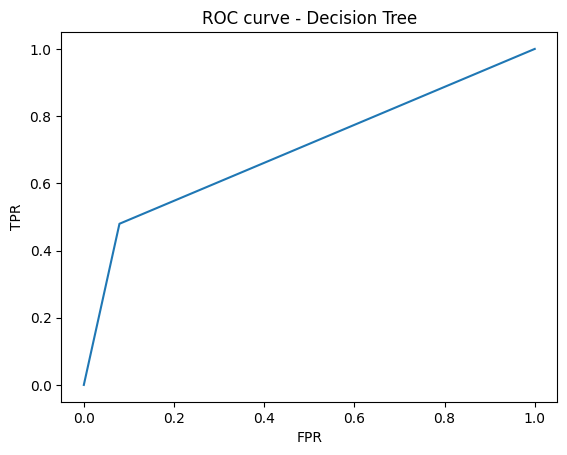

In [62]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

decision_tree_auc = roc_auc_score(y_test, decision_tree_predictions)
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_predictions)
print('ROC auc score for decision tree mode = ',roc_auc_score(y_test, decision_tree_predictions))
plt.plot(decision_tree_fpr, decision_tree_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Decision Tree')
plt.show()